# 6.5 Unsupervised Machine Learning: Clustering

## 1. Imports, Settings, and Loading the Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Load player stats data (example CSV file)
project_path = r'C:\Users\cneva\Projects\NBA Shot Analysis'
df = pd.read_csv(os.path.join(project_path, 'Datasets', '2023-2024 NBA Player Stats.csv'))
pd.set_option("display.max_columns", None) # pd.reset_option("display.max_columns")

## 2. Preparing the Data 

In [5]:
# Filtering out players with less than 10 minutes as these rarely used players could skew the data
df = (df
 .query("MP >= 10")
 .reset_index(drop = True)
)

df.sample(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
66,53,Marques Bolden,C,25,TOT,11,2,11.0,1.5,2.3,0.680,0.0,0.1,0.000,1.5,2.2,0.708,0.680,0.3,0.4,0.750,0.9,2.2,3.1,0.4,0.3,0.6,0.3,0.9,3.4
249,237,Joe Ingles,SF,36,ORL,68,0,17.2,1.5,3.3,0.436,1.0,2.4,0.435,0.4,1.0,0.439,0.590,0.4,0.5,0.824,0.3,1.8,2.1,3.0,0.6,0.1,1.0,1.3,4.4
507,509,P.J. Tucker,PF,38,LAC,28,7,15.0,0.6,1.6,0.356,0.4,1.1,0.367,0.2,0.5,0.333,0.478,0.1,0.1,1.000,1.0,1.6,2.5,0.6,0.5,0.2,0.2,1.6,1.6
250,238,Brandon Ingram,SF,26,NOP,64,64,32.9,7.8,15.9,0.492,1.3,3.8,0.355,6.5,12.1,0.534,0.534,3.8,4.8,0.801,0.7,4.4,5.1,5.7,0.8,0.6,2.5,2.3,20.8
549,554,Malik Williams,C,25,TOR,7,2,15.3,1.3,4.9,0.265,0.1,0.7,0.200,1.1,4.1,0.276,0.279,0.0,0.3,0.000,2.1,3.3,5.4,0.3,0.4,0.6,0.4,2.1,2.7


In [6]:
# Isolate relevant features from the dataframe
features = ['FGA', 'AST', 'STL', 'TRB', 'BLK'] 

# Standardize the features
df_features = (
    df[features]
    .pipe(StandardScaler().fit_transform)
)

## 3. Elbow Method for Optimal Number of Clusters
- The Elbow method reveals that the optimal number of clusters is 4

In [8]:
# Elbow Method to find the optimal number of clusters
inertia = [
    KMeans(n_clusters = k, random_state = 123).fit(df_features).inertia_
    for k in range(1, 11)
]

C:\Users\cneva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\cneva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\cneva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\cneva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

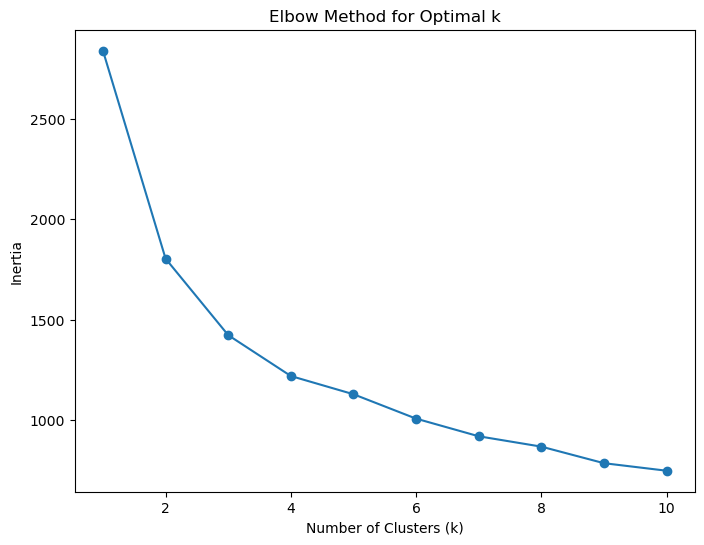

In [9]:
# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker = 'o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

## 4. Performing KMeans for Clustering the Data

In [11]:
# Apply K-Means with 4 clusters
df = df.assign(Cluster = KMeans(n_clusters=4, random_state = 123).fit_predict(df_features))

C:\Users\cneva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


## 5. Analyzing the Clusters 

### A. Attributing the Clusters
Clustering can indentify player archetypes based on player statistics.
- Cluster 1 indicates low statted players.  These players potentially are utility players that help balance the team around star players; or they can simply be low performing
- Cluster 2 indicates the Playmakers who have high assists and high points. Generally holding the ball a majority of the team's time
- Cluster 3 indicates Defensive players who excel at steals and blocks
- Cluster 4 indiactes an All-Rounder who have moderately high stats in all categories

In [14]:
# Analyze the clusters and print the average stats for each cluster
df.groupby('Cluster')[features].mean().round(2)

,FGA,AST,STL,TRB,BLK
Cluster,,,,,
0,4.64,1.35,0.43,2.43,0.25
1,10.52,2.35,0.80,8.93,1.46
2,14.63,5.33,1.02,5.01,0.43
3,7.30,1.96,0.87,4.06,0.56


In [15]:
cluster_assignment = {
    0: 'Other',
    1: 'Playmakers',
    2: 'Defensive Players',
    3: 'All-Rounder'
}

In [16]:
df = df.assign(Cluster = df.Cluster.map(cluster_assignment))
df.sample(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Cluster
547,551,Jaylin Williams,C,21,OKC,69,1,13.0,1.4,3.3,0.417,0.8,2.1,0.368,0.6,1.2,0.500,0.533,0.5,0.6,0.805,0.5,2.9,3.4,1.6,0.4,0.4,0.5,1.4,4.0,Other
382,379,Jusuf Nurki?,C,29,PHO,76,76,27.3,4.2,8.3,0.510,0.3,1.2,0.244,3.9,7.1,0.555,0.528,2.2,3.4,0.640,2.9,8.1,11.0,4.0,1.1,1.1,2.3,3.3,10.9,Playmakers
463,462,Pascal Siakam,PF,29,TOR,39,39,34.7,8.3,16.0,0.522,1.2,3.7,0.317,7.2,12.3,0.584,0.559,4.3,5.7,0.758,1.4,4.9,6.3,4.9,0.8,0.3,2.1,2.2,22.2,Defensive Players
443,440,Terry Rozier,PG-SG,29,TOT,61,60,33.4,7.2,16.4,0.443,2.4,6.7,0.363,4.8,9.6,0.498,0.518,2.8,3.2,0.869,0.6,3.5,4.0,5.6,1.0,0.3,1.7,1.7,19.8,Defensive Players
16,14,OG Anunoby,SF,26,TOT,50,50,34.0,5.6,11.5,0.489,2.0,5.3,0.382,3.6,6.2,0.581,0.577,1.3,1.8,0.753,0.9,3.2,4.2,2.1,1.4,0.7,1.6,2.4,14.7,All-Rounder


### B. Comparing Clusters to Positions
The clusters seem to fit each position archetype well:
- There are a wide variety of position counts for All-Rounders
- Defensive players are dominated by Centers
- Playmakers are dominated by Point Guards

In [18]:
(df \
 .groupby('Cluster')['Pos']
 .value_counts()
 .reset_index(name = 'count')
)


,Cluster,Pos,count
0,All-Rounder,SF,51
1,All-Rounder,PF,45
2,All-Rounder,SG,30
3,All-Rounder,C,29
4,All-Rounder,PG,24
5,All-Rounder,C-PF,1
6,All-Rounder,PF-C,1
7,All-Rounder,PG-SG,1
8,All-Rounder,SF-PF,1
9,All-Rounder,SF-SG,1


### C. Practical Uses for the Cluster Analysis
This cluster analysis can be used for a variety of uses:
- Team Composition and Player Comparison; Ensuring a team is balanced between the different cluster groups would ensure different roles are being fulfilled
- Identifying Outliers; Players who don't fit well into any cluster may be outliers with unique skill sets.  These players might be extremely versatile or specialize in a narrow aspect of the game
- Performance Benchmarks; By looking at the average stats for each clusters, you can set benchmarks for player expectations
- Discovering Overlooked/Undervalued Players

## 6. Visualizing Clusters in 2D

In [21]:
# Reduce to 2D using PCA
df_pca_df = (
    PCA(n_components = 2)
    .fit_transform(df_features)  
)

# Convert to DataFrame
df_pca_df = (
    pd.DataFrame(df_pca_df, columns = ['PC1', 'PC2']) 
    .assign(Cluster = df.Cluster)
)

df_pca_df['Cluster'] = df['Cluster']

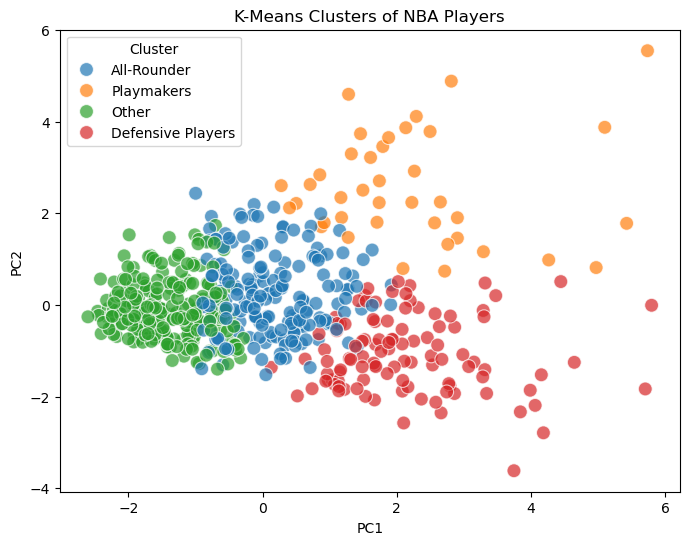

In [22]:
# Plot the clusters
plt.figure(figsize = (8, 6))
sns.scatterplot(
    data = df_pca_df,
    x = 'PC1', 
    y = 'PC2', 
    hue = 'Cluster', 
    palette = 'tab10',  
    s = 100, 
    alpha = 0.7)
plt.title('K-Means Clusters of NBA Players')
plt.show()